In [6]:
# Render additive audio from TSV of partials (freq/amp)
from pathlib import Path
import numpy as np
import pandas as pd
from IPython.display import Audio, display
from py_scripts.fm_synth_opt import synthesize_target_additive, save_wav

# --- Select which TSV to load ---
TSV_PATH = "tsv/cello_single.tsv"

# Load TSV; expected columns: 'Frequency (Hz)', 'Amplitude'
df = pd.read_csv(TSV_PATH, sep='\t')

# Optional: if a 'Modulator' column exists (other TSV formats), keep a stable order
if 'Modulator' in df.columns:
    df = df.sort_values('Modulator')

display(df)

freqs = df['Frequency (Hz)'].to_numpy(dtype=float)
amps = df['Amplitude'].to_numpy(dtype=float)

# Synthesis settings
DURATION = 2.0
try:
    _SR = SR
except NameError:
    _SR = 44100
try:
    _FADE_IN = FADE_IN_MS; _FADE_OUT = FADE_OUT_MS
except NameError:
    _FADE_IN = 10.0; _FADE_OUT = 10.0

# Render additive signal and save with timestamped filename
_, y = synthesize_target_additive(freqs, amps, DURATION, _SR, 
                                  fade_in_ms=_FADE_IN, fade_out_ms=_FADE_OUT)
base_name = f"additive_from_{Path(TSV_PATH).stem}_{DURATION:.1f}s.wav"
out_path = save_wav(f"rendered_audio/{base_name}", y, sr=_SR,
                    fade_in_ms=_FADE_IN, fade_out_ms=_FADE_OUT,
                    add_info=False, add_time=True)

display(Audio(filename=out_path))


,Frequency (Hz),Amplitude
0,73.684211,0.005356
1,136.842105,0.004395
2,147.368421,0.102953
3,223.684211,0.011307
4,297.368421,0.035448
5,371.052632,0.005977
6,442.105263,0.002880
7,447.368421,0.006474
8,521.052632,0.011020
9,594.736842,0.002818


[save_wav] wrote: c:\Users\egorp\Nextcloud\code\public_repos\FFTimbre\rendered_audio\additive_from_cello_single_2.0s_20250906-215542.wav


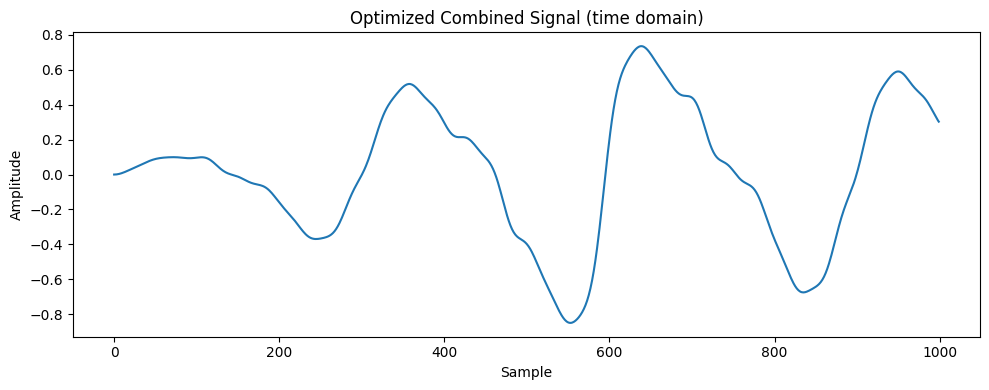

[save_time_plot] wrote: C:\Users\egorp\Nextcloud\code\public_repos\FFTimbre\rendered_plots\additive_from_cello_single_2.0s_20250906-215542_time.png


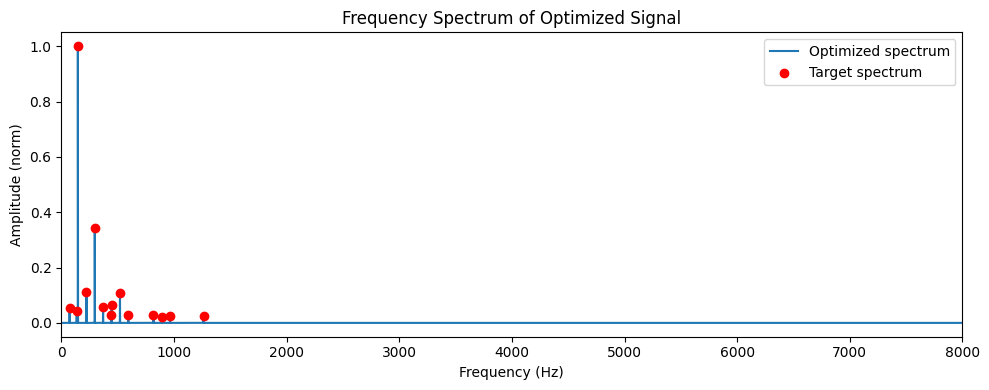

[save_plot] wrote: C:\Users\egorp\Nextcloud\code\public_repos\FFTimbre\rendered_plots\additive_from_cello_single_2.0s_20250906-215542_spectrum.png


In [7]:
import matplotlib.pyplot as plt
from pathlib import Path
from IPython.display import display
from py_scripts.fm_synth_opt import plot_spectrum, plot_time

target_freqs = freqs
target_amps = amps
FFT_PAD = 2

# Time-domain plot
time_fig = plot_time(y, sr=_SR, show=True)
# Optionally save the time-domain plot alongside the audio name
SAVE_TIME_PLOT = True
if SAVE_TIME_PLOT:
    plots_dir = Path('rendered_plots')
    plots_dir.mkdir(parents=True, exist_ok=True)
    time_plot_path = plots_dir / f"{Path(out_path).stem}_time.png"
    time_fig.savefig(time_plot_path, dpi=150)
    print(f"[save_time_plot] wrote: {time_plot_path.resolve()}")
plt.close(time_fig)


# Spectrum plot
spec_fig = plot_spectrum(y, sr=_SR, target_freqs=target_freqs, target_amps=target_amps,
                         xlim=(0, 8000), fft_pad=FFT_PAD, show=True)
# Optionally save the spectrum plot alongside the audio name
SAVE_PLOT = True
if SAVE_PLOT:
    plots_dir = Path('rendered_plots')
    plots_dir.mkdir(parents=True, exist_ok=True)
    plot_path = plots_dir / f"{Path(out_path).stem}_spectrum.png"
    spec_fig.savefig(plot_path, dpi=150)
    print(f"[save_plot] wrote: {plot_path.resolve()}")
plt.close(spec_fig)


